# Linear Regression Modeling: Predicting Student Scores Based on Study Hours

In [ ]:
# add info about you Author, Date, Notebook Version, Python Version, Jupyter Version

--- 

**Summary:**

---

## Table of Contents

## Data Preparation

### Import Libraries

In [98]:
import pandas as pd
import numpy as np

### Read Data

In [72]:
path = r"C:\Users\daeni\Desktop\LOVE\Internships\TSF-Projects\Student Score Prediction Using Supervised ML\Datasets\Student Scores and Study Hours.csv"
student_data = pd.read_csv(path)

### Basic Insights

In [73]:
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [74]:
student_data.columns

Index(['Hours', 'Scores'], dtype='object')

In [75]:
student_data.dtypes

Hours     float64
Scores      int64
dtype: object

In [76]:
student_data.size

50

In [77]:
student_data.shape

(25, 2)

In [78]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [79]:
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Data Analysis

### Import Libraries

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Visualizing the Relationship between Hours and Scores of the Students

#### Regression Plot

In [81]:
student_data[['Hours', 'Scores']].corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


(0.0, 102.17484557287759)

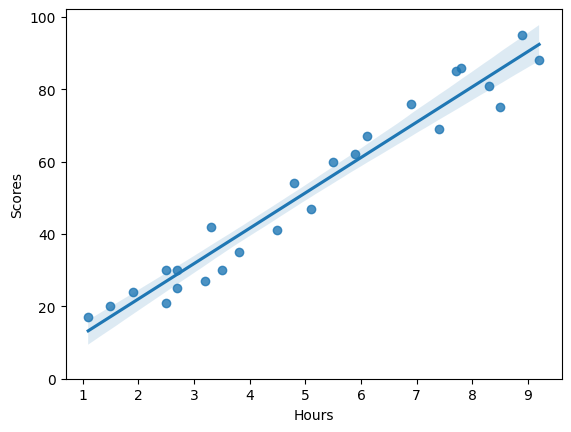

In [82]:
sns.regplot(x="Hours", y="Scores", data=student_data)
plt.ylim(0,)

The more students study, the higher their reflective scores, indicating a positive linear relationship between the two features.

#### Residual Plot

<Axes: xlabel='Hours', ylabel='Scores'>

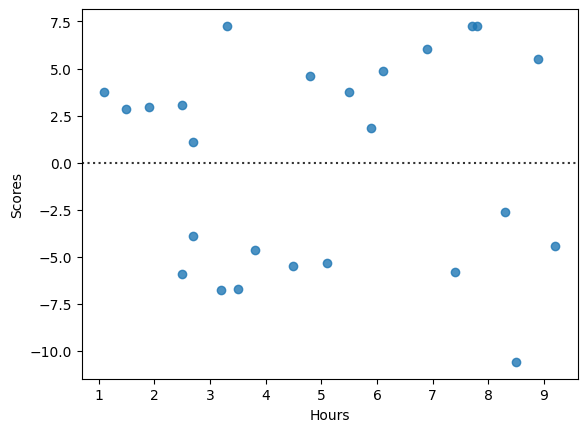

In [83]:
sns.residplot(x=student_data['Hours'], y=student_data['Scores'])

The spread of the residuals is random at the x-axis. A linear regression model is appropriate for this dataset. 

## Model Development

### Import Libraries

In [84]:
from sklearn.linear_model import LinearRegression

### SLR to Predict Scores based on Hours Studied

In [85]:
# Create the linear regression object
lm = LinearRegression()

In [86]:
# Setting predictor (x) and target (y) variables
x = student_data[["Hours"]]
y = student_data[["Scores"]]

In [87]:
# Fitting the linear model
lm.fit(x, y)

LinearRegression()

In [88]:
# Obtain a prediction
y_hat = lm.predict(x)
y_hat

array([[26.92318188],
       [52.3402707 ],
       [33.76624426],
       [85.57800223],
       [36.69898527],
       [17.14737849],
       [92.4210646 ],
       [56.25059205],
       [83.62284155],
       [28.87834256],
       [77.75735951],
       [60.16091341],
       [46.47478866],
       [34.74382459],
       [13.23705714],
       [89.48832358],
       [26.92318188],
       [21.05769985],
       [62.11607409],
       [74.8246185 ],
       [28.87834256],
       [49.40752968],
       [39.63172629],
       [69.9367168 ],
       [78.73493985]])

In [93]:
# Intercept (a) value
lm.intercept_

array([2.48367341])

In [94]:
# Slope (b) value
lm.coef_

array([[9.77580339]])

### Getting estimated values

The final linear model structure is as follows: 

$$ \hat{y} = a + bx $$

**Score Received** = 2.48367341 + 9.77580339 x *Hours Studied*

### Visualizing Predicted Values and Actual Values

#### Distribution Plot

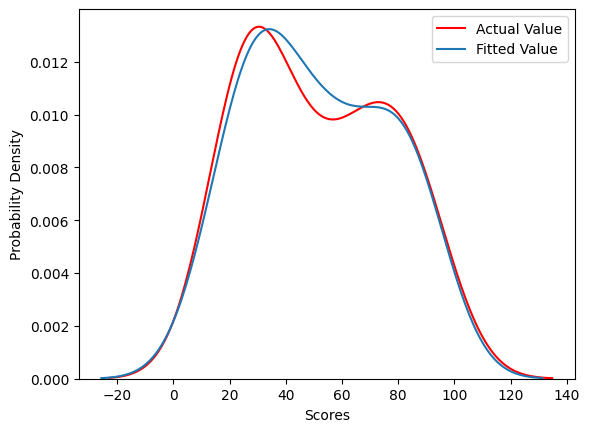

In [91]:
# Create a kernel density estimate plot for actual values
sns.kdeplot(student_data['Scores'], color='r', label='Actual Value')

# Create a kernel density estimate plot for fitted values (y_hat)
sns.kdeplot(y_hat, color='b', label='Fitted Value')

# Add labels and a legend
plt.xlabel('Scores')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()

The KDE plot for actual scores (in red) and predicted scores (in blue) demonstrated a remarkable degree of similarity. The proximity of these two curves indicates that our predictive model has successfully captured the underlying distribution of scores based on the hours studied. This alignment suggests a close correspondence between the model's predictions and the actual scores achieved by the students.

The close match between the two KDE curves not only signifies the accuracy of our model but also its ability to generalize well to new data. This is a positive sign, indicating that the model is effective in making predictions that closely resemble the real-world outcomes.

## Model Evaluation

### Import Libraries

In [100]:
from sklearn.metrics import mean_squared_error

### Mean Squared Error

In [119]:
mse = mean_squared_error(y, y_hat)
mse

28.882730509245466

An MSE of 28.8827 indicates that, on average, the model's predictions deviate from the actual student scores by approximately 28.88 points squared.

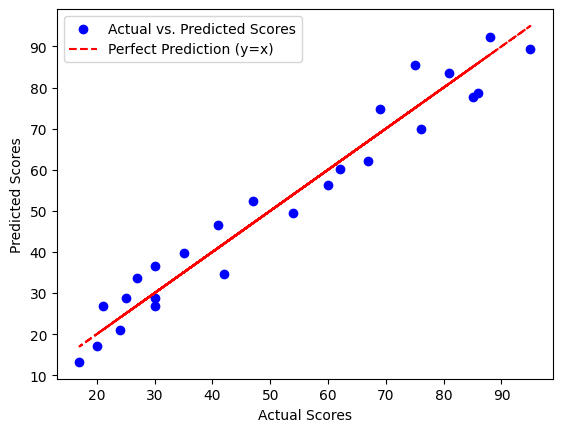

In [118]:
# Calculate RMSE
rmse = np.sqrt(mse)

# Create a scatter plot
plt.scatter(y, y_hat, color='b', label='Actual vs. Predicted Scores')
plt.plot(y, y, linestyle='--', color='r', label='Perfect Prediction (y=x)')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.legend()
plt.show()

The close proximity of the data points to the perfect prediction line is a positive sign that our linear regression model performed well in predicting the scores of the students based on the number of hours they studied, which validates the usage of our model.

### R-squared

In [97]:
lm.score(x,y)

0.9529481969048356

The R-squared value of approximately 0.953 (or 95.3%) indicates that the linear regression model can explain about 95.3% of the variance in student scores, which is a strong indicator of model quality and the suitability of the linear relationship for the data.

## Conclusion